#Proyecto Semestral: Hito 3

##CC5206 Semestre de Primavera 2020

Alumnos: Joaquin Cruz, Ignacio Dassori, Pablo Muñoz, Cristóbal Torres

Profesores: Felipe Bravo, Hernán Sarmiento

Fecha de entrega: 04 de Noviembre de 2020

## Introducción

 Estados Unidos se encuentra dentro de los países con mayor tasa de muertes por mano de la policía al año. En comparación con el resto de países que encabezan la lista, el resto todos presentan o bien conflictos internos (Venezuela y Siria) o políticas severas con respecto al uso de fuerza letal en contra de criminales (Brasil y las Filipinas). Resulta entonces interesante analizar el perfil de las víctimas en los Estados Unidos. Poder ver también si influyen las características que se pueden notar a simple vista en el desenlace de la situación, como si la víctima está armada, si intenta darse a la fuga, la raza a la que pertenece o su género, junto a alguna correlación entre los atributos.

 Para la realización del hito 2 se cambió el dataset por uno más completo que aborda el mismo tipo de datos. Este nuevo dataset contiene por sobre 3000 instancias más que el original y nuevos atributos como la geografía del lugar en que tomo lugar el suceso, el arma que cargaba la víctima al momento de confrontar a la policía y si el policía en cuestión fue acusado de un delito posteriormente. El nuevo dataset contiene un total de 8629 filas y 29 columnas. Además de este dataset se trabajó con dos adicionales a modo de enriquecer el análisis. Estos datos corresponden a la tasa de desempleo y tasa de crímenes violentos por estado.

Los datos fueron extraídos de las siguientes direcciones.
* https://mappingpoliceviolence.org/  (Dataset del proyecto)
* https://ucr.fbi.gov/crime-in-the-u.s  (Índice de crimenes por zona)
* https://datosmacro.expansion.com/paro/  (Índice de desempleo por zona)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_excel("https://mappingpoliceviolence.org/s/MPVDatasetDownload.xlsx")
unemploiment = pd.read_csv("https://raw.githubusercontent.com/TinSlim/Perfil-An-lisis-de-v-ctimas-fatales-por-acci-n-policial-en-los-Estados-Unidos/main/desempleo_new.csv",
                           delimiter=";")
crime_index = pd.read_csv("https://raw.githubusercontent.com/TinSlim/Perfil-An-lisis-de-v-ctimas-fatales-por-acci-n-policial-en-los-Estados-Unidos/main/Violent_Crime_rate.csv",
                          delimiter=";")

!pip3 install plotly --upgrade
import plotly


     |████████████████████████████████| 13.2MB 5.4MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## Limpieza de Datos

Primero es importante ver la cantidad de datos que trae el dataset y además revisar cuántos valores nulos (NaN) hay en este mismo.

In [ ]:
print("Cantidad de Datos: ", len(data))
print("Cantidad de nulos totales: ",data.isnull().sum().sum(), "\n")

data.head(1)

Cantidad de Datos:  8709
Cantidad de nulos totales:  24496 



,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,County,Agency responsible for death,ORI Agency Identifier (if available),Cause of death,A brief description of the circumstances surrounding the death,Official disposition of death (justified or other),Criminal Charges?,Link to news article or photo of official document,Symptoms of mental illness?,Unarmed/Did Not Have an Actual Weapon,Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),MPV ID,Fatal Encounters ID
0,Name withheld by police,Unknown,Male,White,NaN,2020-12-15,1100 Sussex Trail,Pearland,TX,77584.0,NaN,Pearland Police Department,TX0201000,Gunshot,Police responded to a call of a person being h...,Pending investigation,No known charges,https://www.click2houston.com/news/local/2020/...,No,Allegedly Armed,gun,attack,NaN,no,6430.0,NaN,Suburban,8707,NaN


Para comenzar la limpieza de datos se eliminan los atributos que no resultan relevantes para el análisis e interpretación de datos que se llevará a cabo y aquellos cuya cantidad de datos nulos sea muy elevada. Los atributos no relevantes son "Street Adress of Incident", Victims's name", "URL of image of victim", "WaPo ID", "Fatal Encounters ID", "MPV ID", "Agency respondsible for death", "Link to news article or photo of official document", "Zipcode", "ORI Agenct Identifier" y "A brief description of the circumstances surrounding the death". Los atributos "Off-Duty Killing" y "Body Camera" si bien son interesantes de analizar contienen una gran cantidad de datos nulos, por lo cual no serán considerados. Por último, el atributo "Unarmed/Did Not Have an Actual Weapon" especifica si la persona se encontraba armada, pero la existencia de otro atributo que especifica el arma portada o la ausencia de una lo convierte en redundante. Esto mismo se aplica para los atributos "Official disposition of death" y "Criminal charges", ya que el segundo es una manera más compacta de describir la información presentada por el primero.

Para reducir el ruido del dataset se eliminaron datos ambigüos o mal ingresados, como valores "Unknown" o edades que incluían letras. También se eliminaron datos de muy baja frecuencia que podrían ser considerados como ruido o poco representativos. Estos fueron, por ejemplo, causas de muerte poco comunes con menos de 10 instancias en todo el dataset.

In [ ]:
tamanho_inicial = len(data)

data_cleaned = data.drop(["Street Address of Incident","Victim's name","URL of image of victim",
                          "WaPo ID (If included in WaPo database)","Fatal Encounters ID","MPV ID",
                          "Agency responsible for death","Link to news article or photo of official document",
                          "Zipcode","ORI Agency Identifier (if available)","A brief description of the circumstances surrounding the death",
                          "Off-Duty Killing?", "Body Camera (Source: WaPo)","Unarmed/Did Not Have an Actual Weapon", "Official disposition of death (justified or other)"
                          ],axis=1)

data_cleaned = data_cleaned.dropna()
data_cleaned = data_cleaned.rename(columns = {"Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )":"geography",
                                              "Victim's age":"age",
                                              "Victim's gender":"gender",
                                              "Date of Incident (month/day/year)":"Date",
                                              "Official disposition of death (justified or other)": "Disposition of death",
                                              "Victim's race":"race",
                                              "Cause of death":"manner_of_death",
                                              "State":"state",
                                              "Fleeing (Source: WaPo)":"flee",
                                              "Alleged Threat Level (Source: WaPo)":"threat_level",
                                              "Symptoms of mental illness?":"mental_ilness",
                                              "Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)":"weapon",
                                              "Disposition of death":"disposition",
                                              "Criminal Charges?":"criminal_charges",
                                              "County":"county",
                                              "City":"city"})

data_cleaned = data_cleaned[data_cleaned['age'] != 'Unknown']
data_cleaned = data_cleaned[data_cleaned['age'] != '40s']

data_cleaned = data_cleaned[data_cleaned['gender'] != 'Unknown']
data_cleaned = data_cleaned[data_cleaned['gender'] != 'Transgender']
data_cleaned = data_cleaned[data_cleaned['gender'] != 'Male ']

data_cleaned["flee"] = data_cleaned["flee"].str.lower()

data_cleaned = data_cleaned[data_cleaned['race'] != 'Unknown race']
data_cleaned = data_cleaned[data_cleaned['race'] != 'Unknown Race']

data_cleaned = data_cleaned[(data_cleaned['manner_of_death'] != 'Gunshot, Bean Bag Gun') & (data_cleaned['manner_of_death'] != 'Gunshot, Beanbag Gun') &
                            (data_cleaned['manner_of_death'] != 'Gunshot, Pepper Spray') & (data_cleaned['manner_of_death'] != 'Gunshot, Police Dog') &
                            (data_cleaned['manner_of_death'] != 'Gunshot, Unspecified Less Lethal Weapon') & (data_cleaned['manner_of_death'] != 'Other') &
                            (data_cleaned['manner_of_death'] != 'Physical restraint') & (data_cleaned['manner_of_death'] != 'Physical Restraint') &
                            (data_cleaned['manner_of_death'] != 'Bomb') & (data_cleaned['manner_of_death'] != 'Asphyxiated') & 
                            (data_cleaned['manner_of_death'] != 'Beaten') & (data_cleaned['manner_of_death'] != 'Pepper Spray') &
                            (data_cleaned['manner_of_death'] != 'Gunshot, Vehicle')] 

data_cleaned = data_cleaned.replace(to_replace="Gunshot, Taser, Baton", value="Gunshot, Taser")
data_cleaned = data_cleaned.replace(to_replace="Taser", value="Tasered")

cambiar=[]
for p in data_cleaned["criminal_charges"]:
  if "charged" in p.lower() and p.lower() not in cambiar:
    cambiar.append(p)
for p in cambiar:
  data_cleaned = data_cleaned.replace(to_replace=p, value="Charged")

tamanho_final = len(data_cleaned)

print("Tamaño pre procesado: ",tamanho_inicial,"\nTamaño post procesado: ", tamanho_final,"\n")
print("Diferencia: ",tamanho_inicial-tamanho_final)
print("Porcentaje eliminado: ",(int(100-((tamanho_final*100)/tamanho_inicial))),'%')

Tamaño pre procesado:  8709 
Tamaño post procesado:  5116 

Diferencia:  3593
Porcentaje eliminado:  41 %


Si bien se descartó un 41% de los datos totales, se sigue contando con un volumen de datos razonablemente grande para realizar un análisis.

In [ ]:
data_cleaned.head(4)

,age,gender,race,Date,city,state,county,manner_of_death,criminal_charges,mental_ilness,weapon,threat_level,flee,geography
14,47,Male,White,2020-12-09,Oxford,MS,Lafayette,Gunshot,No known charges,No,gun,attack,not fleeing,Suburban
15,22,Male,Black,2020-12-09,La Marque,TX,Galveston,Gunshot,No known charges,No,undetermined,undetermined,foot,Suburban
20,28,Male,Hispanic,2020-12-06,Rowland Heights,CA,Los Angeles,Gunshot,No known charges,No,vehicle,attack,car,Suburban
21,28,Male,Black,2020-12-06,St. Louis,MO,St. Louis City,Gunshot,No known charges,No,screwdriver,other,not fleeing,Urban


Después de la limpieza obtenemos un dataset con 5091 datos y 14 atributos. Posteriormente se agregaron los datos correspondientes a los datasets de tasas de criminalidad y desempleo, lo que involucró un trabajo sobre estos para poder incluirlos como nuevos atributos. En ambos casos las tasas se encontraban ordenadas por fecha y estado, siendo las de desempleo mensuales y las de criminalidad anuales. Para poder concatenar estas tablas primero se modificaron las fechas de las muertes para solo incluir mes y año, y se creó una nueva columna "key" que mezcla la fecha y estado del incidente. Esta nueva columna se agrega también a copias de los datasets "unemploiment" y "crime_index", y estas se concatenan con el dataset a trabajar. La columna "key" ya no es necesaria así que se elimina y se renombraron ciertos atributos para tener coherencia con el resto.

Es importante mencionar que las cifras de tasa de criminalidad por estado en los Estados Unidos para el año 2020 aún no se han hecho públicas por la página oficial del FBI, fuente en la cual se obtuvieron los datos para años pasados. Para este análisis se consideraron para el 2020 los mísmos índices de criminalidad de finales del 2019.

In [ ]:
data_without_day = data_cleaned.copy()
data_without_day['Date'] = data_without_day['Date'].apply(lambda x: x.strftime('%Y-%m'))
data_without_day['key'] = data_without_day[['Date', 'state']].apply(lambda x: ''.join(x), axis=1)

unemploiment_ch = unemploiment.rename(columns = {"date_my":"Date"})
unemploiment_ch['key'] = unemploiment_ch[['Date', 'state']].apply(lambda x: ''.join(x), axis=1)
unemploiment_ch = unemploiment_ch.drop(["Date","state"],axis = 1)

crime_index_ch = crime_index
crime_index_ch['key'] = crime_index[['Date', 'State']].apply(lambda x: ''.join(x), axis=1)
crime_index_ch = crime_index_ch.drop(["Date","State"],axis = 1)
                      
concatenate = pd.merge(data_without_day,unemploiment_ch, on = 'key')

concatenate = pd.merge(concatenate,crime_index_ch, on = 'key')
concatenate = concatenate.drop(["key"],axis = 1)
concatenate = concatenate.rename(columns = {"coef":"unemployment_rate",
                                            "Violent Crime Rate":"crime_rate",
                                            "Date":"date"})

data_cleaned = concatenate
concatenate.head(5)

,age,gender,race,date,city,state,county,manner_of_death,criminal_charges,mental_ilness,weapon,threat_level,flee,geography,unemployment_rate,crime_rate
0,57,Male,White,2020-06,Paducah,KY,McCracken,Gunshot,No known charges,No,undetermined,undetermined,car,Suburban,0.043,217.1
1,48,Male,White,2020-06,Hazleton,PA,Luzerne,Gunshot,No known charges,No,gun,attack,car,Urban,0.130,306.4
2,68,Male,White,2020-06,Kettering,OH,Montgomery,Gunshot,No known charges,Yes,gun,attack,not fleeing,Suburban,0.109,293.2
3,58,Male,Black,2020-06,Little Rock,AR,Pulaski,"Gunshot, Taser",No known charges,No,knife,attack,other,Suburban,0.080,584.6
4,36,Male,White,2020-06,Bryant,AR,Saline,Gunshot,Charged,No,undetermined,undetermined,not fleeing,Suburban,0.080,584.6


Aqui se tiene una vision preliminar de los datos que se trabajarán, son 5091 datos con 16 atributos: 

* age (int)

* gender (categoric)

* race (categoric)

* date (año-mes-dia)

* city (categoric)

* state (categoric)

* county (categoric)

* manner_of_death (categoric)

* criminal_charges (categoric)

* mental_ilness (categoric)

* weapon (categoric)

* threat_level (categoric)

* flee (categoric)

* geography (categoric)

* unemployment_rate (float)

* crime_rate (float)

# Análisis de datos

En la siguiente sección se presentan distintos gráficos generados a partir de los datos tras su limpieza. En base a estos se realiza una exploración inicial de la distribución de los datos en base a sus atributos. 

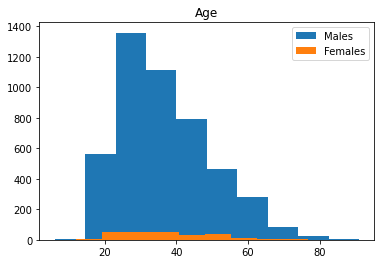

Media:  36.47
Desviación:  12.8
Mediana:  34.0
Moda:  25


In [ ]:
datos = data_cleaned

males = datos[datos['gender'] == 'Male']
females = datos[datos['gender'] == 'Female']

age = datos['age']
plt.hist(males['age'], label="Males")
plt.hist(females['age'], label="Females")
plt.legend()
plt.title("Age")
plt.show()

print("Media: ",round(age.mean(), 2))
print("Desviación: ", round(age.std(), 2))
print("Mediana: ",age.median())
print("Moda: ",age.mode()[0])


El gráfico de edad nos muestra que hay una gran diferencia entre la cantidad de mujeres y hombres en el dataset, además se observa que hay un gran incremento en la cantidad de personas involucradas en disparos policiales a partir de los 23-24 años aprox para el caso de los hombres, siendo este el punto de mayor concentración de los datos para luego ir descendiendo a medida que crece la edad.
En el caso de las mujeres la cantidad de datos se mantiene bastante estable en el rango de edad de 20-40 años, para luego ir descendiendo a medida que crece la edad

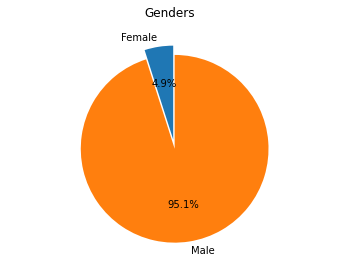

In [ ]:
gender = datos.groupby('gender').size()
gender = gender.to_dict()


labels = gender.keys()

total = 0
for p in gender.values():
  total+=p
porcentajes = []
for p in gender.values():
  porcentajes.append(p/total)
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
fig1.suptitle('Genders')
ax1.pie(porcentajes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

En el grafo se observa con mayor claridad la gran diferencia entre las víctimas hombres y mujeres. Esto podría deberse a una sobrerrepresentación de hombres en el dataset, pero dada la gran cantidad y origen de los datos es razonable concluir que este no es el caso.

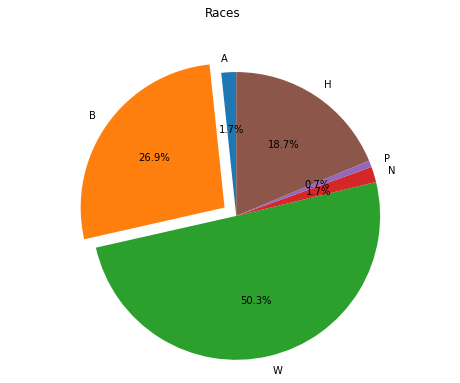

In [ ]:
race = datos.groupby('race').size()
race = race.to_dict()

race["A"] = race.pop("Asian")
race["B"] = race.pop("Black")
race["W"] = race.pop("White")
race["N"] = race.pop("Native American")
race["P"] = race.pop("Pacific Islander")
race["H"] = race.pop("Hispanic")


labels = race.keys()

total = 0
for p in race.values():
  total+=p
porcentajes = []
for p in race.values():
  porcentajes.append(p/total)
explode = (0, 0.1,0,0,0,0)  


fig1, ax1 = plt.subplots(figsize=(8,6))
fig1.suptitle('Races')
ax1.pie(porcentajes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

Las etiquetas corresponden a las razas de las personas que fueron disparadas por la policia, siendo

W: White

B: Black

A: Asian

N: Native American

H: Hispanic

P: Pacific Islander

Se observa que en la mayoría de los casos las personas fallecidas son de raza W, seguido de B y H, mientras tanto las otras razas tienen representación considerablemente menor con respecto a las otras en los datos

In [ ]:
datos.groupby('manner_of_death').size()

manner_of_death
Gunshot           4628
Gunshot, Taser     224
Tasered             73
Vehicle             12
dtype: int64

Text(0.5, 0.98, 'Manner of death')

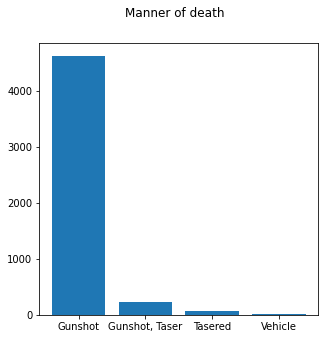

In [ ]:
manner_of_death = datos.groupby('manner_of_death').size()
manner_of_death = manner_of_death.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axs.bar(manner_of_death.keys(),manner_of_death.values())
fig.suptitle('Manner of death')


La manera en que las víctimas murieron fueron mayoritariamente sólo por disparos de armas de fuego, pero también hubo una cantidad no despreciable de personas que murieron por causa de disparos y arma de electrochoque, los casos de muerte por solo taser y por solo vehiculos son mínimos en comparacación a los otros.

Text(0.5, 0.98, 'State where the shot happened')

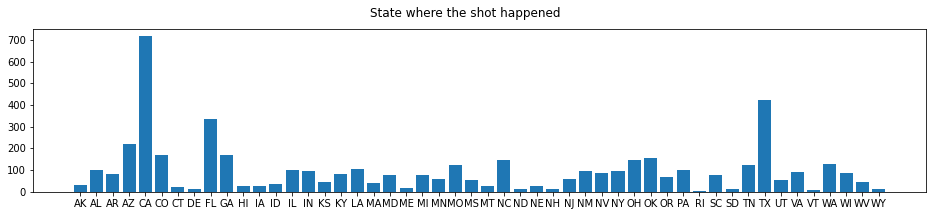

In [ ]:
state = datos.groupby('state').size()
state = state.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(16, 3), sharey=True)
axs.bar(state.keys(),state.values())
fig.suptitle('State where the shot happened')

Las etiquetas corresponden a la abreviacion de dos letras del codigo postal de cada estado, este gráfico muestra donde ocurrieron los disparos de la policia,
siendo CA=California y Tx=Texas los estados donde ocurren más muertes por disparos de policias

Text(0.5, 0.98, 'Fleeing attempt')

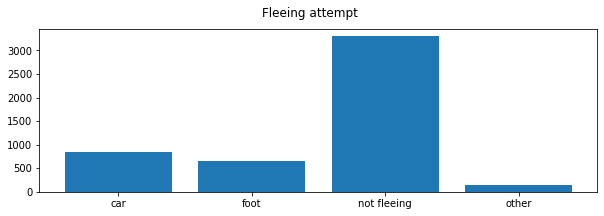

In [ ]:
flee = datos.groupby('flee').size()
flee = flee.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(10, 3), sharey=True)
axs.bar(flee.keys(),flee.values())
fig.suptitle('Fleeing attempt')

Este grafico muestra si hubo un intento de escapar por parte de la persona de la policia, y de ser asi que medio uso para esto, se observa que la mayoría de las personas no intento escapar al momento del encuentro con la policia y que los restantes escaparon mayoritariamente por auto o a pie.

Text(0.5, 0.98, 'Threat level')

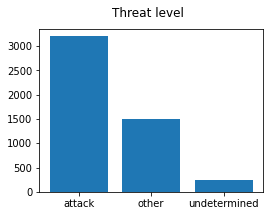

In [ ]:
threat_level= datos.groupby('threat_level').size()
threat_level = threat_level.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(4, 3), sharey=True)
axs.bar(threat_level.keys(),threat_level.values())
fig.suptitle('Threat level')

El gráfico muestra el nivel de amenaza presentado por la víctima. En la mayoría de los casos este fue calificado como "ataque", seguido de "otro" y por último una pequeña cantidad no determinada.

Text(0.5, 0.98, 'Criminal charges')

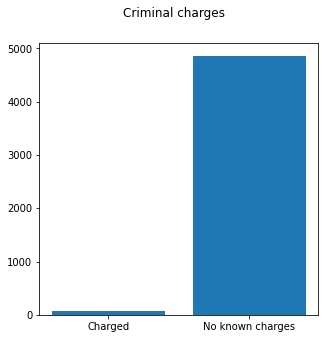

In [ ]:
criminal_charges = datos.groupby('criminal_charges').size()
criminal_charges = criminal_charges.to_dict()


fig, axs = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
axs.bar(criminal_charges.keys(),criminal_charges.values())
fig.suptitle('Criminal charges')

La mayoría de los casos de disparos policiales terminan sin cargos conocidos para el policía

In [ ]:
from urllib.request import urlopen
import json
%pip install -U plotly
import plotly.express as px
import requests
import urllib

# cargamos el geojson de counties
with urlopen("https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json") as response:
   counties_geojson = json.load(response)

# cargamos el geojson de counties
with urlopen("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json") as response:
   state_geojson = json.load(response)

# cargamos el csv con los FIPS codes
state_fips = pd.read_csv("https://raw.githubusercontent.com/kjhealy/fips-codes/master/state_fips_master.csv")
state_fips = state_fips.drop(["state_name","long_name","sumlev",
                          "region", "division", "state", "region_name", "division_name"],axis=1)
state_fips = state_fips.rename(columns = {"state_abbr":"state"})
for p in range(10):
  state_fips = state_fips.replace(to_replace=p, value="0"+str(p))

datos = pd.merge(datos, state_fips, on='state')
data_state_fips_count = datos.groupby('fips', as_index=False).count()  # todas las columnas, menos fips, ahora tienen la misma info
data_state_fips_count['Cantidad de Casos']=data_state_fips_count['date']  # así que creamos una que tenga un nombre representativo


Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


In [ ]:
# Y Graficamos
# -- FIPS:State
fig = px.choropleth(data_state_fips_count, geojson=state_geojson, locations='fips', color='Cantidad de Casos',
                           color_continuous_scale="Viridis",
                           range_color=(0, 716),
                           scope="usa"
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Este mapa representa la densidad de víctimas por estado en los Estados Unidos por medio de un código de colores.

Text(0.5, 0.98, 'Shootings count for unemployment rate')

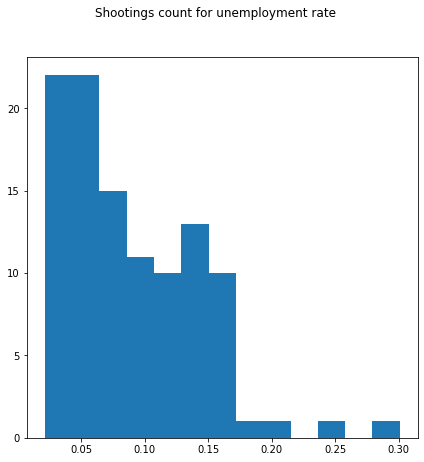

In [ ]:
unemployment = datos.groupby("unemployment_rate").size()

unemployment = unemployment.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(7, 7), sharey=True)
axs.hist(unemployment.keys(),bins = 13)
fig.suptitle('Shootings count for unemployment rate')

Usando los datos que se agregaron, al agrupar tiroteos de acuerdo al índice de desempleo, se identifica que mientras mayor es este índice, menos tiroteos policiales hay, manteniendo esa tendencia excepto para índices cercanos al 0.15.

Text(0.5, 0.98, 'Shootings count for crime rate')

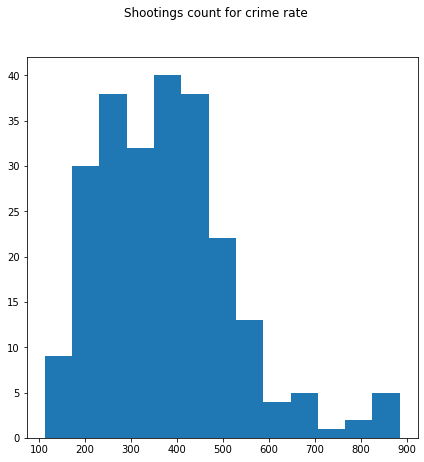

In [ ]:
unemployment = datos.groupby("crime_rate").size() #crime_rate

unemployment = unemployment.to_dict()

fig, axs = plt.subplots(1, 1, figsize=(7, 7), sharey=True)
axs.hist(unemployment.keys(),bins = 13)
fig.suptitle('Shootings count for crime rate')

Usando los datos que se agregaron, al agrupar tiroteos de acuerdo a la tasa de criminalidad, se logra identifica que en las menores tasas en la medida que crecen, hay una mayor cantidad de tiroteos, sin embargo después del valor 400, comienza a decrecer de modo que mientras menor se hace este índice, menos tiroteos policiales se llevan a cabo.

# Preguntas y Problemas:

A partir de la motivación original y la exploración del dataset presentada anteriormente, se formulan las siguientes preguntas que tratarán de ser respondidas mediante la minería de datos:

* ¿Con los datos que se tienen, es posible predecir la raza de una persona muerta por acción policial a partir de los otros atributos, de ser así, el modelo es confiable?

* ¿Es posible predecir la causa de muerte de una persona al realizar un oversampling de los datos?

* ¿Existe algún grupo con ciertas características que sea disparado más frecuentemente por la policía?

* ¿Es posible predecir la mayoría de las veces si una persona intenta escapar o no de los policias, y de ser asi, qué método logra más aciertos basandose en los otros atributos?




    

    

    





# Pre-procesamiento

Antes de proceder a contestar las preguntas se realiza un pre-procesamiento de los datos para reemplazar los datos categoricos por valores numericos de las siguiente manera:

##gender
Female:0

Male:1

##race
Asian:0

Black:1

Hispanic:2

Native American:3

Pacific Islander:4

White:5

##city
Se ordenan los nombres de las ciudades por nombre alfabético y se les asigna valores del 0 hacia arriba, siendo el 0 la primera ciudad ordenada alfabeticamente.

##state
Se ordenan los nombres de los estados por nombre alfabético y se les asigna valores del 0 hacia arriba, siendo el 0 el primer estado ordenado alfabeticamente.

##county
Se ordenan los nombres de los condados por nombre alfabético y se les asigna valores del 0 hacia arriba, siendo el 0 el primer condado ordenado alfabeticamente.

##manner_of_death
Gunshot:0

Gunshot, taser:1

tasered:2

vehicle:3

##criminal_charges

charged:0

no known charges:1

##threat_level
attack:0

other:1

undetermined:2

##flee

car:0

foot:1

not fleeing:2

other:3

##geography

Suburban:0

Urban:1



In [ ]:
datos = data_cleaned.copy()

def categoric_to_num(name, datos):
  contador=0
  dic={}
  for x in datos.groupby(name):
    if (x[0] not in dic):
      dic[x[0]]=contador
      contador+=1
  for x in dic.keys():
    datos[name]=datos[name].replace(to_replace=x,value=dic[x])

In [ ]:
colstonumeric = ["gender", "race", "city", "state", "county", "manner_of_death", "criminal_charges", "mental_ilness", "weapon", "threat_level", "flee", "geography"]
for name in colstonumeric:
  categoric_to_num(name, datos)

'''
categoric_to_num("gender", datos)
categoric_to_num("race", datos)
categoric_to_num("city", datos)
categoric_to_num("state", datos)
categoric_to_num("county", datos)
categoric_to_num("manner_of_death", datos)
categoric_to_num("criminal_charges", datos)
categoric_to_num("mental_ilness", datos)
categoric_to_num("weapon", datos)
categoric_to_num("threat_level", datos)
categoric_to_num("flee", datos)
categoric_to_num("geography", datos)
'''
datos.head(5)

,age,gender,race,date,city,state,county,manner_of_death,criminal_charges,mental_ilness,weapon,threat_level,flee,geography,unemployment_rate,crime_rate
0,57,1,5,2020-06,1484,16,542,0,1,1,92,2,0,1,0.043,217.1
1,48,1,5,2020-06,852,37,509,0,1,1,44,0,0,3,0.130,306.4
2,68,1,5,2020-06,996,34,580,0,1,5,44,0,2,1,0.109,293.2
3,58,1,1,2020-06,1120,2,697,1,1,1,55,0,3,1,0.080,584.6
4,36,1,5,2020-06,239,2,748,0,0,1,92,2,2,1,0.080,584.6


#Metodolgía:


- Para contestar la primera pregunta, utilizando métodos de clasificación como árboles de decisión o un Support Vector Machine, se buscará predecir la raza de una persona que muere por acción policial a través de sus otros atributos. Para ello, se dividirán los datos en entrenamiento y test, y utilizando la variable raza como etiqueta se implementarán estos algoritmos de clasificación para predecirla. Para medir la confiabilidad se usarán las métricas precision, recall y f1, si se obtienen valores mayores a 80% se considerará confiable.

- Para contestar la pregunta 2, nuevamente utilizando métodos de clasificación, como árboles de decisión y Support Vector Machines, se buscará predecir la causa de muerte de una persona que muere por acción policial. Como la mayoría de las causas de muerte son por una pistola, primero se dividirán en datos de entrenamiento y test, y luego se hará un oversampling de las otras causas de muerte en los datos de entrenamiento. Una vez hecho esto, utilizando la causa de muerte como etiqueta, se implementarán estos algoritmos de clasificación para predecirla. Se considerará que si puede predecir, si obtiene resultados mayores a 70% en las métricas precision, recall y f1.

- Para contestar la pregunta 3 se utilizará clasificación no supervisada, formando clusters del tipo jerárquico y particional. Se utilizarán métodos como K-means, clustering jerarquico aglomerativo y DBSCAN. Tambien se crearán clusters sin considerar ciertos atributos para ver si se puede generar una mejor agrupación. Para decidir que método genera mejores clusters se usarán las metricas de matriz de incidencia, SSE, cohesión y separación, luego con los clusters formados se hará una comparación de las densidades de estos, si existe una diferencia significativa en la densidad de los clusters esto implica que existe un grupo que es disparado mas frecuentemente por los policias.

- Para contestar la pregunta 4, nuevamente utilizando métodos de clasificación, como árboles de decisión y Support Vector Machines, se buscará predecir si una persona intenta escapar o no de los policias, y de escaparse se buscará predecir que método usa. Como la mayoría de las personas no escapan, primero se dividirán en datos de entrenamiento y test, y luego se hará un oversampling de los otros métodos de escape en los datos de entrenamiento. Una vez hecho esto, utilizando el método de escape como etiqueta, se implementarán estos algoritmos de clasificación para predecirla. Luego se medirán los modelos usando las métricas precision, recall y f1 y se considerará al modelo que obtenga más de 50% en las métricas y obtenga los mejores resultados en las métricas entre los tres

#Pregunta 1:

Para responder esta pregunta primero debemos separar el dataset, dejando el atributo raza como etiqueta. Además, eliminamos todas aquellas columnas que no sean relevantes para el análisis como la fecha o que sea conveniente eliminar dada su gran cantidad de valores posibles, como es el caso para el atributo "weapon". Se eliminan las columnas "city" y "county" para así analizar el caso más general que corresponde a los estados. Una vez hecho esto se separan los datos en entrenamiento y test.

In [ ]:
from sklearn.model_selection import train_test_split

X = datos.drop(columns=["race", "date", "county", "city"])
y = datos["race"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=35, stratify=y)

Se probarán tres clasificadores diferentes: Árboles de decisión, SVM y KNN. Evaluamos todos los casos y buscamos el que entregue los mejores resultados:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.55      0.23      0.32       438
           2       0.44      0.44      0.44       305
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        12
           5       0.59      0.83      0.69       819

    accuracy                           0.56      1630
   macro avg       0.26      0.25      0.24      1630
weighted avg       0.53      0.56      0.51      1630



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00       438
           2       0.00      0.00      0.00       305
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        12
           5       0.50      1.00      0.67       819

    accuracy                           0.50      1630
   macro avg       0.08      0.17      0.11      1630
weighted avg       0.25      0.50      0.34      1630



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.40      0.49      0.44       438
           2       0.38      0.38      0.38       305
           3       0.00      0.00      0.00        29
           4       0.00      0.00      0.00        12
           5       0.60      0.56      0.58       819

    accuracy                           0.49      1630
   macro avg       0.23      0.24      0.23      1630
weighted avg       0.48      0.49      0.48      1630



Decission Tree entrega los mejores resultados, con valores de precision, recall y f1-score de 0.53, 0.56 y 0.51 respectivamente. Sin embargo, estos valores no son lo suficientemente altos para considerar al clasificador como confiable. Además, ninguno de los clasificadores es capaz de predecir las razas con menor representación, es decir asian, pacific islander y native american. Podemos concluir que no es posible predecir efectivamente la raza de una persona en base a sus otros atributos con el dataset sobre el cual se trabajó. 

#Pregunta 2

Para responder esta pregunta primero debemos separar el dataset, dejando el atributo manner_of_death como etiqueta. Además, eliminamos todas aquellas columnas que no sean relevantes para el análisis como la fecha. Una vez hecho esto se separan los datos en entrenamiento y test para luego proceder a realizar el oversampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
datos_p2=datos.copy()
datos_p2 = datos_p2[datos_p2['manner_of_death'] != 3]
datos_p2=datos_p2.drop(columns=["date"])

y_to = datos_p2.iloc[:, 6]

X_train, X_test, Y_train, Y_test = train_test_split(datos_p2, y_to, test_size=.33, random_state=3, stratify=y_to)

print("initial Data")
print(X_train['manner_of_death'].value_counts())

X_train = X_train.reset_index(drop=True)

# oversampling sobre la clase Gunshot, tasered
idx = np.random.choice(X_train[X_train['manner_of_death'] == 1].index, size=2950)
idx_2=np.random.choice(X_train[X_train['manner_of_death'] == 2].index, size=3051)
data_oversampled = pd.concat([X_train, X_train.iloc[idx],X_train.iloc[idx_2]])

print("-----")

print("Data oversampled")
print(data_oversampled['manner_of_death'].value_counts())

X_over = data_oversampled
X_over=X_over.drop(["manner_of_death"],axis=1)
Y_over = data_oversampled["manner_of_death"]
X_train=X_over
Y_train=Y_over
X_test=X_test.drop(["manner_of_death"],axis=1)

initial Data
0    3100
1     150
2      49
Name: manner_of_death, dtype: int64
-----
Data oversampled
2    3100
1    3100
0    3100
Name: manner_of_death, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Árbol de Decisión (max_depth = 2):")
print(classification_report(Y_test, Y_pred))

Árbol de Decisión (max_depth = 2):
              precision    recall  f1-score   support

           0       0.98      0.77      0.86      1528
           1       0.12      0.46      0.19        74
           2       0.13      0.79      0.23        24

    accuracy                           0.76      1626
   macro avg       0.41      0.68      0.43      1626
weighted avg       0.93      0.76      0.82      1626



In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Support Vector Machine:")
print(classification_report(Y_test, Y_pred))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.94      0.19      0.32      1528
           1       0.04      0.47      0.07        74
           2       0.02      0.42      0.04        24

    accuracy                           0.21      1626
   macro avg       0.33      0.36      0.15      1626
weighted avg       0.89      0.21      0.30      1626



El oversampling logra métricas y resultados bajos para el uso de support vector machine, donde solo entrega resultados confiables en la predicción si la victima murió solo por un diparo. Por otro lado al usar un árbol de decisión con máxima profundidad de 2 mejora mucho para predecir si la víctima muere de otras formas. Se obtienen en promedio métricas mayores a 40% al usar el árbol de decisión, de modo que este clasificador no es lo suficientemente preciso para ser utilizado, sin embargo puede ser usado para evaluar los datos teniendo en consideracion que las predicciones pueden ser erradas.

# Pregunta 3

Primero, se borran los atributos "county" y "city", que no se utilizarán para el clasificador porque son muy especifícos y separan demasiado la información.
Por otro lado, el atributo edad se agrupa en intervalos de a 10 para que los modelos de clustering puedan utilizar esa información.
Además, del atributo fechas se consideran solo los meses, para poder clusterizar si es que hay patrones en las fechas del año en que ocurren los tiroteos.

In [ ]:
datos_cat = datos.copy()
datos_cat = datos.drop(columns=["county", "city"])
# además, agrupamos las edades en rangos de 10
datos_cat["age"] = (datos_cat["age"]//10)*10
datos_cat.head()
# y nos quedamos con solo los meses de las fechas
datos_cat["mes"] = pd.DatetimeIndex(datos_cat['date']).month
datos_cat = datos_cat.drop(columns=["date"])

datos_cat.head(5)

,age,gender,race,state,manner_of_death,criminal_charges,mental_ilness,weapon,threat_level,flee,geography,unemployment_rate,crime_rate,mes
0,50,1,5,16,0,1,1,92,2,0,1,0.043,217.1,6
1,40,1,5,37,0,1,1,44,0,0,3,0.130,306.4,6
2,60,1,5,34,0,1,5,44,0,2,1,0.109,293.2,6
3,50,1,1,2,1,1,1,55,0,3,1,0.080,584.6,6
4,30,1,5,2,0,0,1,92,2,2,1,0.080,584.6,6


##### Funciones para evaluar las métricas de clustering

In [ ]:
# definimos funciones para evaluar gráficamente el comportamiento de los clusters que se generen
from sklearn.metrics.pairwise import euclidean_distances
def sim_matrix(features, labels):
    useful_labels = labels >= 0

    # primero ordenamos los datos en base al cluster que pertencen
    indices = np.argsort(labels[useful_labels])
    sorted_features = features[useful_labels][indices]

    # calculamos las distancias entre todos los puntos
    d = euclidean_distances(sorted_features, sorted_features)
    return d

def plot(data, model):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

    fig.suptitle(f"{model.__class__.__name__}")

    ax1.scatter(data[:,0], data[:,1], c=model.labels_)

    dist = sim_matrix(data, model.labels_)
    im = ax2.imshow(dist, cmap="jet")
    fig.colorbar(im, ax=ax2)

#### K-Means

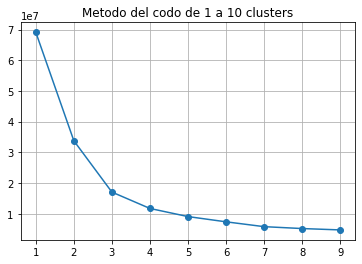

In [ ]:
# primero, buscamos el numero de clusters ideal para k-means

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

sse = []

clusters = list(range(1, 10))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(datos_cat)
    sse.append(kmeans.inertia_)

plt.plot(clusters, sse, marker="o")
plt.title("Metodo del codo de 1 a 10 clusters")
plt.grid(True)
plt.show()

K-means, 5  clusters


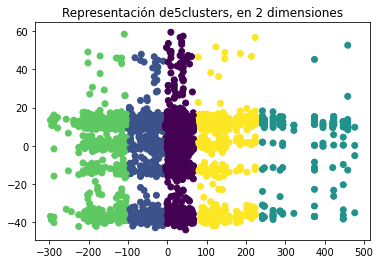

In [ ]:
# una vez encontramos el número de clusters ideal, que es 4, aplicamos
n_clusters = 5
print("K-means,", n_clusters, " clusters")

from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Classifiers
from sklearn.cluster import KMeans


# Datos completos y transformados a 2-D
X = datos_cat
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)


# Modelos de entrenamiento
kmeans = KMeans(n_clusters=n_clusters, n_init=20, max_iter=300, random_state=2021)
kmeans.fit(X)
kpredict = kmeans.predict(X)

plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("Representación de"+str(n_clusters)+"clusters, en 2 dimensiones")
plt.show()

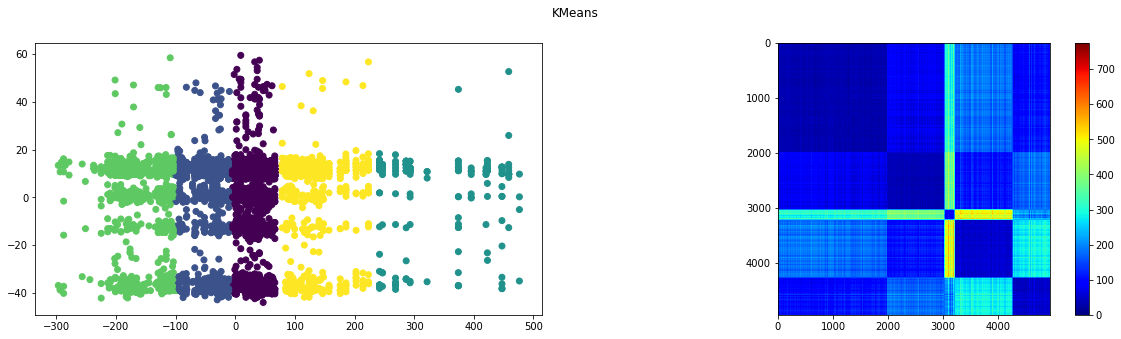

In [ ]:
plot(new_X, kmeans)
plt.show()

#### Clustering Jerárquico Aglomerativo

Primero se debe identificar dónde cortar los clusters, para lo que se realizan dendogramas


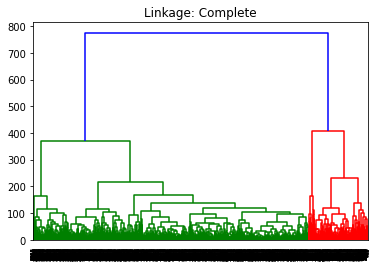

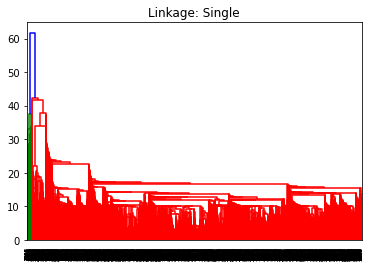

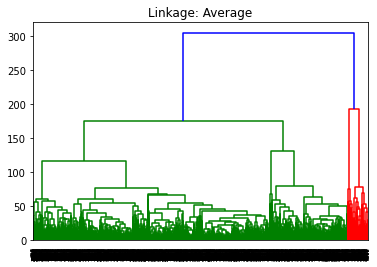

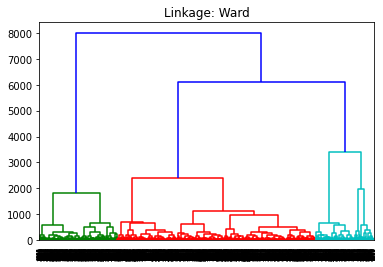

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Datos completos y transformados a 2-D
X = datos_cat
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)

print("Primero se debe identificar dónde cortar los clusters, para lo que se realizan dendogramas")

complete = linkage(X, method="complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")


dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

dendrogram(single)
plt.title("Linkage: Single")
plt.show()

dendrogram(average)
plt.title("Linkage: Average")
plt.show()

dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

A continuación, se muestran las aglomeraciones elegidas con los cortes elegidos.
No se utilizará single porque se observa en el dendograma que no generará buenos clusters porque no tiene buenos cortes

Aglomerative clustering, complete linkage: clusters generated= 6
asignados a cada cluster:
0    2689
5     858
4     556
1     526
3     223
2      85
dtype: int64




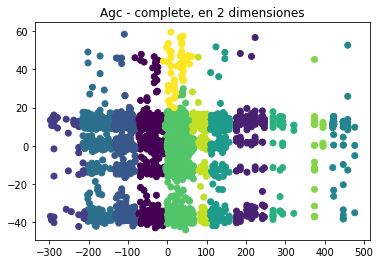

In [ ]:
print("A continuación, se muestran las aglomeraciones elegidas con los cortes elegidos.\
\nNo se utilizará single porque se observa en el dendograma que no generará buenos clusters porque no tiene buenos cortes\n")

from pandas import DataFrame as df

# Datos completos y transformados a 2-D
X = datos_cat
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)

agc_complete = AgglomerativeClustering(n_clusters=None,linkage="complete",distance_threshold=180).fit(X)
print("Aglomerative clustering, complete linkage: clusters generated=", agc_complete.n_clusters_)
print("asignados a cada cluster:")
print(df(agc_complete.labels_).stack().value_counts())
print("\n")
# graficamos para dimensiones reducidas
complete = AgglomerativeClustering(linkage="complete", n_clusters=12).fit(new_X)
plt.scatter(new_X[:, 0], new_X[:, 1], c=complete.labels_)
plt.title("Agc - complete, en 2 dimensiones")
plt.show()

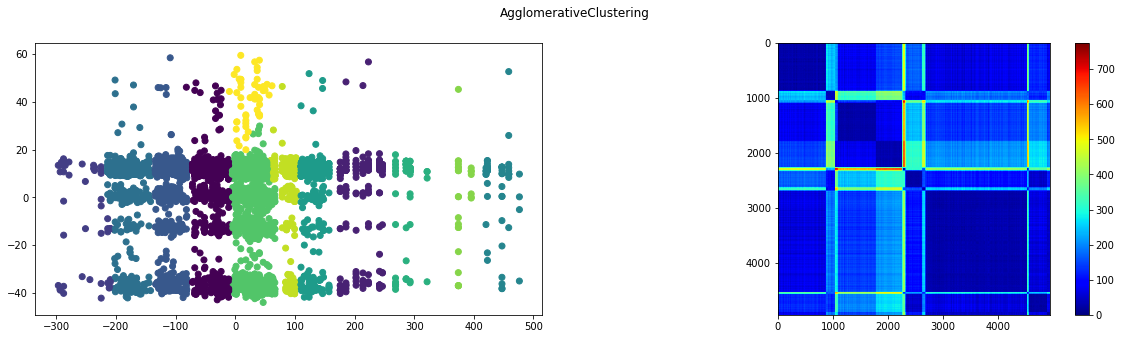

In [ ]:
plot(new_X, complete)
plt.show()

Aglomerative clustering, complete linkage: clusters generated= 6
3    2924
0    1113
5     562
1     220
2      81
4      37
dtype: int64




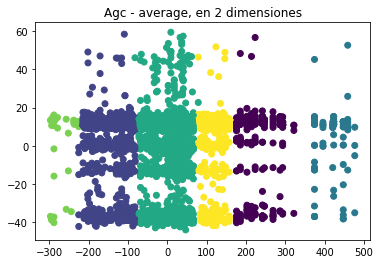

In [ ]:
agc_average = AgglomerativeClustering(n_clusters=None,linkage="average",distance_threshold=100).fit(X)
print("Aglomerative clustering, average linkage: clusters generated=", agc_average.n_clusters_)
print(df(agc_average.labels_).stack().value_counts())
print("\n")

# Datos completos y transformados a 2-D
X = datos_cat
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)

# graficamos para dimensiones reducidas
average = AgglomerativeClustering(linkage="average", n_clusters=6).fit(new_X)
plt.scatter(new_X[:, 0], new_X[:, 1], c=average.labels_)
plt.title("Agc - average, en 2 dimensiones")
plt.show()

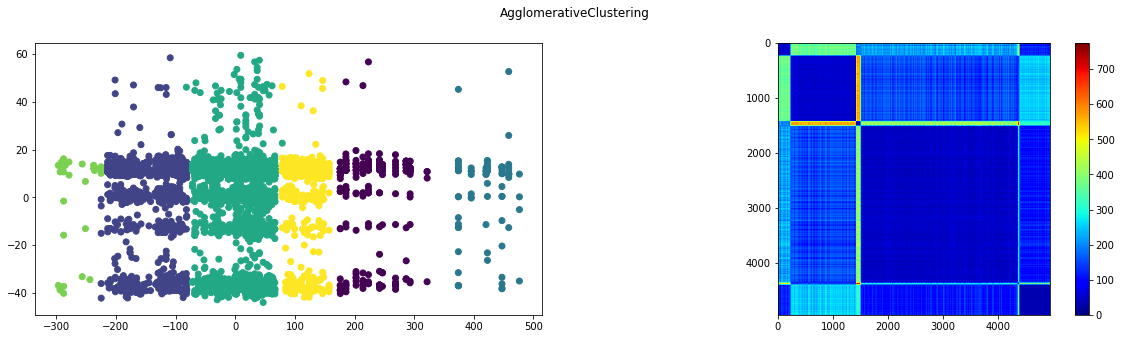

In [ ]:
plot(new_X, average)
plt.show()

Aglomerative clustering, complete linkage: clusters generated= 7
0    2036
1     889
6     623
3     581
2     526
4     201
5      81
dtype: int64




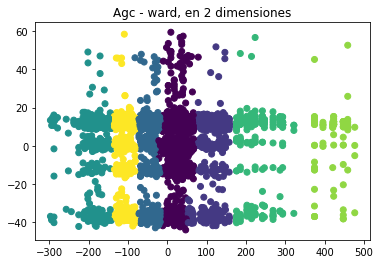

In [ ]:
agc_ward = AgglomerativeClustering(n_clusters=None,linkage="ward",distance_threshold=1500).fit(X)
print("Aglomerative clustering, ward linkage: clusters generated=", agc_ward.n_clusters_)
print(df(agc_ward.labels_).stack().value_counts())
print("\n")

# Datos completos y transformados a 2-D
X = datos_cat
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)

# graficamos para dimensiones reducidas
ward = AgglomerativeClustering(linkage="ward", n_clusters=7).fit(new_X)
plt.scatter(new_X[:, 0], new_X[:, 1], c=ward.labels_)
plt.title("Agc - ward, en 2 dimensiones")
plt.show()

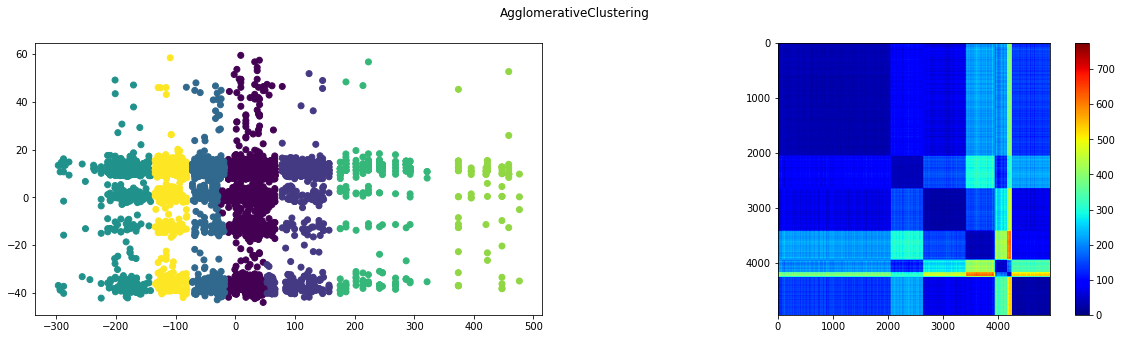

In [ ]:
plot(new_X, ward)
plt.show()

#### DBScan

dbscan


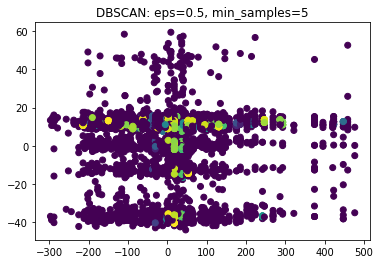

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

print("dbscan")
from sklearn.cluster import DBSCAN

# Datos completos y transformados a 2-D
X = datos_cat
from sklearn.decomposition import PCA
new_X = PCA(n_components=2, random_state=0).fit_transform(X)

eps = 0.5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(new_X)
plt.scatter(new_X[:,0], new_X[:,1], c=dbscan.labels_)
plt.title(f"DBSCAN: eps={eps}, min_samples={min_samples}")
plt.show()

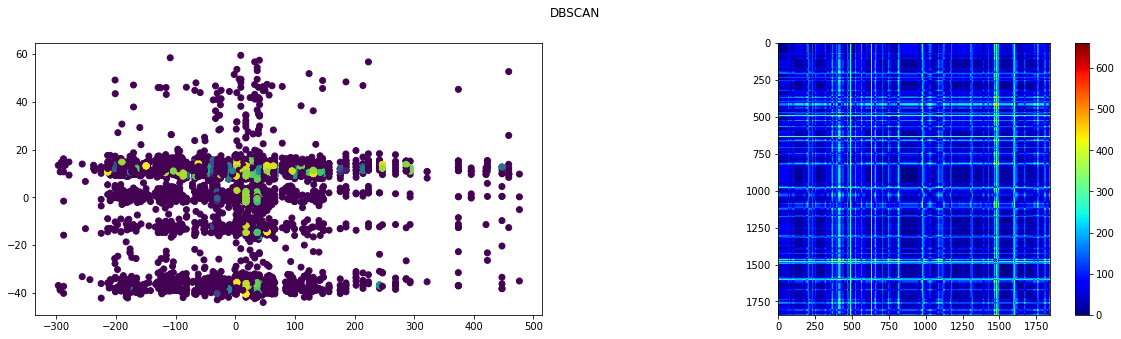

In [ ]:
plot(new_X, dbscan)
plt.show()

Las técnicas de clustering, incluso habiendo agrupado las edades en intervalos, no encuentran buenos clusters. Esto se observa al graficar la matriz de similitud para ver la cercanía entre los clusters. Bajo ninguno de los modelos utilizados, que son K-means, Aglomerative Clustering y DBScan, se encuentran clusters muy separados entre si.

En este caso, que DBScan no funcione bien parece indicar que los conjuntos tienen muy grandes diferencias de densidades.

# Pregunta 4

Se borran algunos atributos que no se usarán para el clasifiador, entre estos la fecha para no asignar peso a la fecha en la que ocurre el hecho y se eliminan también los atributos *city* y *county*, esto para usar solo el estado al momento de clasificar. Por último se borra la clase 3 en flee, esto ya que es *other* y por su poca cantidad se considera ruido. Quedando con con las clases cuando la víctima huye a pie, en auto o bien no huye.

In [ ]:
data_p4 = datos.drop(columns=["date", "county", "city"])
data_p4 = data_p4[data_p4['flee'] != 3]

In [ ]:
# Se selecciona atributo flee
y_to = data_p4.iloc[:,9:10]

# Se separan datos de train y test
X_train, X_test, y_train, y_test = train_test_split(data_p4, y_to, test_size=.33, random_state=3, stratify=y_to)

# Se imprime cantidad de datos sin oversampling
print("Datos sin oversampling:")
print(X_train['flee'].value_counts())

# Se resetean indices
X_train = X_train.reset_index(drop=True)

# Se hace oversampling sobre clase 0 y 1
idx = np.random.choice(X_train[X_train['flee'] == 1].index, size=1774)
idx_2 = np.random.choice(X_train[X_train['flee'] == 0].index, size=1643)
data_oversampled = pd.concat([X_train, X_train.iloc[idx],X_train.iloc[idx_2]])

# Se imprime cantidad de datos con oversampling
print("-------")
print("Datos con oversampling:")
print(data_oversampled['flee'].value_counts())

# Se guardan datos de entrenamiento
X_over = data_oversampled
X_over = X_over.drop(['flee'],axis = 1)
y_over = data_oversampled['flee']

# Se elimina atributo flee de datos de test
X_test = X_test.drop(['flee'],axis = 1)

Datos sin oversampling:
2    2208
0     565
1     434
Name: flee, dtype: int64
-------
Datos con oversampling:
2    2208
1    2208
0    2208
Name: flee, dtype: int64


In [ ]:
## Se crea un clasificador y se entrena con data oversampled
clfDTp4 = DecisionTreeClassifier(max_depth=3)
clfDTp4.fit(X_over, y_over)
y_pred = clfDTp4.predict(X_test)
print("Árbol de Decisión (max_depth = 3):")
print(classification_report(y_test, y_pred))

Árbol de Decisión (max_depth = 3):
              precision    recall  f1-score   support

           0       0.71      0.28      0.40       279
           1       0.18      0.77      0.29       213
           2       0.82      0.40      0.54      1088

    accuracy                           0.43      1580
   macro avg       0.57      0.48      0.41      1580
weighted avg       0.72      0.43      0.48      1580



In [ ]:
## Se crea un clasificador y se entrena con data oversampled
clfSVCp4 = SVC()
clfSVCp4.fit(X_over, y_over)
y_pred = clfSVCp4.predict(X_test)
print("Support Vector Machine:")
print(classification_report(y_test, y_pred))

Support Vector Machine:
              precision    recall  f1-score   support

           0       0.35      0.37      0.36       279
           1       0.18      0.60      0.28       213
           2       0.78      0.42      0.55      1088

    accuracy                           0.44      1580
   macro avg       0.44      0.46      0.40      1580
weighted avg       0.63      0.44      0.48      1580



El oversampling logra métricas y resultados bajos para el uso de support vector machine, donde solo entrega resultados confiables en la predicción si la víctima no huye. Por otro lado al usar un árbol de decisión con máxima profundidad de tres, mejora mucho para predecir si la víctima huye en auto o no huye. Se obtienen en promedio métricas mayores a 50% al usar el árbol de decisión, de modo que este clasificador es mejor, además es suficientemente confiable al superar ese porcentaje.

# Planificación Futura

Los datos actuales no son suficientes para obtener los mejores modelos, por lo tanto un tema importante es la adición de más datos, que puedan además incluir  nuevos atributos.

Algo también a considerar a futuro es probar más combinaciones de atributos, evaluando también si eliminar columnas mejora los modelos, probar distintas configuraciones para los modelos, entre ellos el más importante usar otros kernels para los SVM. Además probar el uso de otros modelos, entre ellos el perceptrón multicapa, que podría tener mejores resultados. También considerar otras métricas para medir los modelos de clustering.


# Aportes de Cada Integrante:

* Joaquin Cruz:
	* Hito 1: Obtención de datos de estado y condados para el mapa de calor, generación de mapas de calor. Powerpoint.
	* Hito 2: Discusiones sobre limpieza de datos. Copia de datos sin día. Actualización de mapa de calor. Preguntas y Problemas. Metodología para responder las preguntas de investigación.
  * Hito 3: Pregunta 3.

* Ignacio Dassori:
	* Hito 1: Introducción, descripción de gráficos, y preguntas. Powerpoint.
	* Hito 2: Discusiones sobre limpieza de datos. Actualización de gráficos descriptivos. Búsqueda y adaptación datos de tasa de criminalidad, limpieza de esos datos. Preguntas y Problemas.
  * Hito 3: Pregunta 1.

* Pablo Muñoz:
	* Hito 1: Gráficos y descripción del informe. Powerpoint.
	* Hito 2: Discusiones sobre limpieza de datos. Actualización de descripciones del informe. Actualización de gráficos descriptivos. Preguntas y Problemas. Metodología para responder las preguntas.
  * Hito 3: Pregunta 2.

* Cristóbal Torres:
	* Hito 1: Página web y limpieza de datos, gráficos, mapas de calor. Powerpoint.
	* Hito 2: Discusiones sobre limpieza de datos. Limpieza efectiva de los nuevos datos. Copia de datos sin día. Actualización de mapa de calor. Búsqueda y adaptación datos de desempleo por año,mes y estado. Gráfico índice de desempleo y tasa de criminalidad. Preguntas y Problemas. 
  * Hito 3: Pregunta 4.
